In [8]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import optuna
import mlflow
from sklearn.model_selection import GridSearchCV
from pmdarima.arima import auto_arima
from keras.models import load_model
import joblib
from weatherapi import WeatherPoint
import requests
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pickle
from pmdarima.arima import auto_arima
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from keras.models import load_model
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from datetime import datetime
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import xgboost as xgb

#root_path = "/projects/app" #это если в контейнере 
root_path = "."  #это если в локальной машине
path_data = f'{root_path}/data'
your_mlflow_tracking_uri = f'{root_path}/mlruns'

mlflow.set_tracking_uri(your_mlflow_tracking_uri)

### 0. This file for time series models training

The data is provided by the website "Reliable Prognosis", rp5.ru

#### 1. sarimax grid search

In [16]:
data = pd.read_excel('data/archive.xls')

In [17]:
data

,Local time in Moscow,T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
0,25.04.2024 21:00,14.9,744.0,757.3,0.9,69.0,"Calm, no wind",0.0,NaN,NaN,...,"No Altocumulus, Altostratus or Nimbostratus.","Cirrus fibratus, sometimes uncinus, not progre...",20,9.2,No precipitation,12.0,NaN,NaN,NaN,NaN
1,25.04.2024 18:00,20.6,743.1,756.1,0.2,46.0,Wind blowing from the south-southeast,1.0,NaN,NaN,...,"No Altocumulus, Altostratus or Nimbostratus.","Cirrus fibratus, sometimes uncinus, not progre...",20,8.6,No precipitation,12.0,NaN,NaN,NaN,NaN
2,25.04.2024 15:00,20.2,742.9,755.8,0.1,53.0,Wind blowing from the south-east,2.0,NaN,NaN,...,"No Altocumulus, Altostratus or Nimbostratus.","Cirrus fibratus, sometimes uncinus, not progre...",20,10.2,NaN,NaN,NaN,NaN,NaN,NaN
3,25.04.2024 12:00,18.1,742.8,755.8,0.1,55.0,Wind blowing from the south-southeast,2.0,NaN,NaN,...,"No Altocumulus, Altostratus or Nimbostratus.",Cirrostratus covering the whole sky.,19,8.9,NaN,NaN,NaN,NaN,NaN,NaN
4,25.04.2024 09:00,14.1,742.7,756.1,-1.1,58.0,Wind blowing from the south-southeast,3.0,NaN,NaN,...,"No Altocumulus, Altostratus or Nimbostratus.","Cirrus (often in bands) and Cirrostratus, or C...",20,5.8,0.1,12.0,Surface of ground wet (standing water in small...,8.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65505,01.02.2005 15:00,-6.6,746.8,761.8,NaN,83.0,Wind blowing from the south-east,3.0,NaN,NaN,...,Altocumulus castellanus or floccus.,"Cirrocumulus alone, or Cirrocumulus accompanie...",4,-9.0,NaN,NaN,NaN,NaN,NaN,NaN
65506,01.02.2005 12:00,-7.1,745.0,760.0,NaN,85.0,Wind blowing from the south-east,3.0,NaN,NaN,...,NaN,NaN,10,-9.2,NaN,NaN,NaN,NaN,NaN,NaN
65507,01.02.2005 09:00,-8.6,743.5,758.6,NaN,89.0,Wind blowing from the south-east,3.0,NaN,NaN,...,Altostratus translucidus.,"Cirrocumulus alone, or Cirrocumulus accompanie...",4,-10.1,3,12.0,NaN,NaN,Even layer of loose dry snow covering ground c...,43
65508,01.02.2005 06:00,-8.2,742.8,757.9,NaN,90.0,Wind blowing from the south-east,3.0,NaN,NaN,...,Altostratus translucidus.,"Cirrocumulus alone, or Cirrocumulus accompanie...",NaN,-9.6,2,12.0,NaN,NaN,NaN,NaN


C:\ProgramData\anaconda3\envs\kaggle\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
12 fits failed out of a total of 72.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\envs\kaggle\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Peter\AppData\Local\Temp\ipykernel_22240\3279974755.py", line 38, in fit
  File "C:\ProgramData\anaconda3\envs\kaggle\lib\site-packages\statsmodels\tsa\statespace\sarimax.py", line 328, in __init__
    self._spec = SARIMAXSpecification(
  File "C:\ProgramData\anaconda3\

Best Parameters: {'order': (2, 1, 2), 'seasonal_order': (2, 1, 2, 12)}
Mean Squared Error (Best Model): 1104.2110575158808


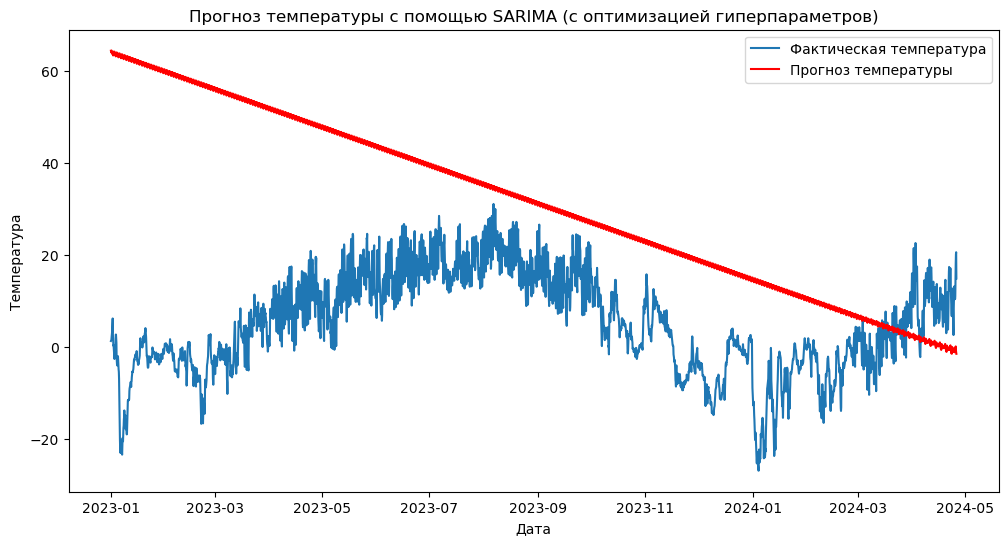

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, RegressorMixin

# Преобразование столбца 'Local time in Moscow' в формат datetime и установка его в качестве индекса
data['Local time in Moscow'] = pd.to_datetime(data['Local time in Moscow'], format='%d.%m.%Y %H:%M')
data.set_index('Local time in Moscow', inplace=True)

# Выбор столбца с температурой для прогнозирования
temperature = data['T']

data = data.loc[data.index > '2022-01-01']

# Заполнение пропущенных значений в столбце 'T' средним значением
data['T'].fillna(data['T'].mean(), inplace=True)

# Разделение данных на тренировочный и тестовый наборы по времени
train = data.loc[data.index < '2023-01-01']
test = data.loc[data.index >= '2023-01-01']
endog_column = 'T'  # Замените 'T' на фактическое имя столбца, содержащее целевую переменную
endog_train = train[endog_column]
endog_test = test[endog_column]

param_grid = {
    'order': [(0, 0, 0), (1, 1, 1), (1, 1, 2), (2, 1, 1), (2, 1, 2), (2, 1, 30)],  # расширенный диапазон значений для параметров (p, d, q)
    'seasonal_order': [(1, 1, 1, 12), (1, 1, 2, 12), (2, 1, 1, 12), (2, 1, 2, 12)]  # расширенный диапазон значений для сезонных параметров (P, D, Q, S)
}

class SARIMAXWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)):
        self.order = order
        self.seasonal_order = seasonal_order

    def fit(self, X, y=None):
        self.model = SARIMAX(X, order=self.order, seasonal_order=self.seasonal_order)
        self.results = self.model.fit()
        return self

    def predict(self, X, y=None):
        return self.results.forecast(steps=len(X))

# Создание и обучение модели SARIMA с использованием GridSearchCV
model = SARIMAXWrapper()
grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
grid_search.fit(endog_train.values.reshape(-1, 1), endog_train)

# Получение наилучших гиперпараметров
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Создание и обучение модели SARIMA с наилучшими найденными параметрами
best_model = SARIMAXWrapper(order=best_params['order'], seasonal_order=best_params['seasonal_order'])
best_model.fit(endog_train.values.reshape(-1, 1))

# Прогнозирование на тестовом наборе с использованием наилучшей модели
forecast = best_model.predict(endog_test.values.reshape(-1, 1))

# Оценка производительности наилучшей модели
mse = mean_squared_error(endog_test, forecast)
print('Mean Squared Error (Best Model):', mse)

# Визуализация результатов
plt.figure(figsize=(12, 6))
plt.plot(endog_test.index, endog_test, label='Фактическая температура')
plt.plot(endog_test.index, forecast, color='red', label='Прогноз температуры')
plt.title('Прогноз температуры с помощью SARIMA (с оптимизацией гиперпараметров)')
plt.xlabel('Дата')
plt.ylabel('Температура')
plt.legend()
plt.show()


#### 2. xgb 

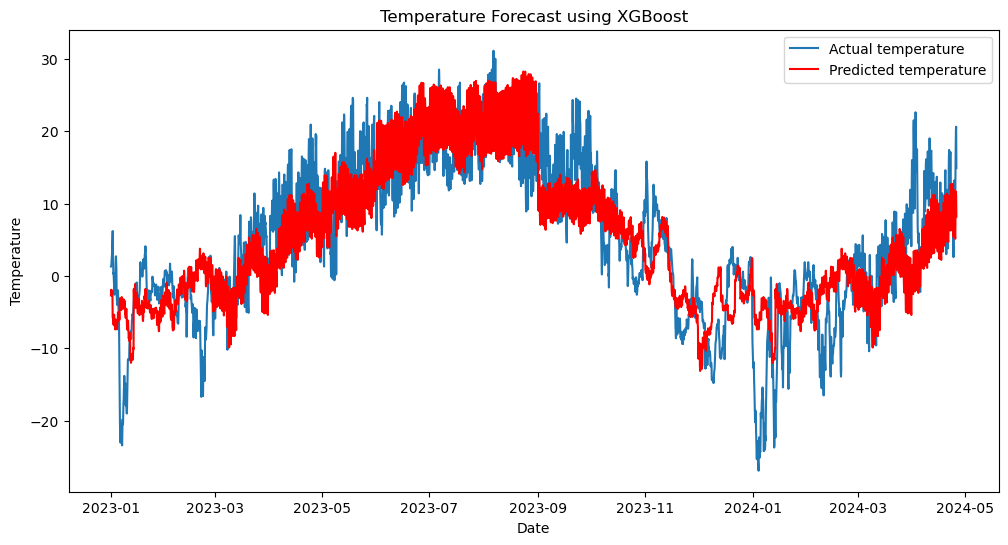

In [144]:

# Load data
data = pd.read_excel('data/archive.xls')

data['T'] = data['T'].interpolate(method='linear')

data = data[['Local time in Moscow', 'T']]

data['Local time in Moscow'] = pd.to_datetime(data['Local time in Moscow'], format='%d.%m.%Y %H:%M')

train = data.loc[data['Local time in Moscow'] < '2023-01-01']
test = data.loc[data['Local time in Moscow'] >= '2023-01-01']

# Preprocess data
X_train = train['Local time in Moscow']
X_test = test['Local time in Moscow']
y_train = train['T']
y_test = test['T']


# Extract datetime features
X_train_features = pd.DataFrame()
X_train_features['year'] = X_train.dt.year
X_train_features['month'] = X_train.dt.month
X_train_features['day'] = X_train.dt.day
X_train_features['hour'] = X_train.dt.hour

X_test_features = pd.DataFrame()
X_test_features['year'] = X_test.dt.year
X_test_features['month'] = X_test.dt.month
X_test_features['day'] = X_test.dt.day
X_test_features['hour'] = X_test.dt.hour

# Create and fit XGBoost model
my_xgb = xgb.XGBRegressor()
my_xgb.fit(X_train_features, y_train)

# Make predictions
forecast = my_xgb.predict(X_test_features)

# Visualize results
plt.figure(figsize=(12, 6))
plt.plot(X_test, y_test, label='Actual temperature')
plt.plot(X_test, forecast, color='red', label='Predicted temperature')
plt.title('Temperature Forecast using XGBoost')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()


In [3]:


# Загрузите новые данные и предобработайте их, извлекая признаки
# Пример: новые данные хранятся в переменной new_data
new_data = ['2024-05-31 21:00:00']

def temp_pred_xgb(data,model):    
    # Преобразуйте новые данные в DataFrame и укажите правильное имя столбца
    data_df = pd.DataFrame(data, columns=['Local time in Moscow'])
    data_df['Local time in Moscow'] = pd.to_datetime(data_df['Local time in Moscow'], format='%Y-%m-%d %H:%M:%S')
    
    # Извлеките признаки из новых данных
    data_features = pd.DataFrame()
    data_features['year'] = data_df['Local time in Moscow'].dt.year
    data_features['month'] = data_df['Local time in Moscow'].dt.month
    data_features['day'] = data_df['Local time in Moscow'].dt.day
    data_features['hour'] = data_df['Local time in Moscow'].dt.hour

    # Сделайте предсказания
    predictions = model.predict(data_features)
    return predictions[0]

In [7]:


# Сохранение модели
#joblib.dump(my_xgb, 'back/my_xgb_model.joblib')

# Загрузка модели
loaded_model = joblib.load('back/my_catb_model.joblib')


In [8]:
new_data = ['2024-06-28 12:00:00']


In [9]:
temp_pred_xgb(new_data,loaded_model)

24.273487458337783

#### 3. Catboost

Learning rate set to 0.078524
0:	learn: 10.1819742	total: 166ms	remaining: 2m 46s
1:	learn: 9.6342137	total: 170ms	remaining: 1m 24s
2:	learn: 9.1439314	total: 174ms	remaining: 57.9s
3:	learn: 8.6921871	total: 178ms	remaining: 44.3s
4:	learn: 8.2929669	total: 182ms	remaining: 36.1s
5:	learn: 7.9287740	total: 185ms	remaining: 30.6s
6:	learn: 7.6053736	total: 189ms	remaining: 26.8s
7:	learn: 7.3049603	total: 193ms	remaining: 24s
8:	learn: 7.0407898	total: 197ms	remaining: 21.7s
9:	learn: 6.8126931	total: 202ms	remaining: 20s
10:	learn: 6.6001969	total: 206ms	remaining: 18.6s
11:	learn: 6.4100352	total: 210ms	remaining: 17.3s
12:	learn: 6.2354103	total: 214ms	remaining: 16.2s
13:	learn: 6.0825631	total: 218ms	remaining: 15.3s
14:	learn: 5.9469784	total: 222ms	remaining: 14.6s
15:	learn: 5.8299249	total: 226ms	remaining: 13.9s
16:	learn: 5.7251525	total: 230ms	remaining: 13.3s
17:	learn: 5.6263463	total: 235ms	remaining: 12.8s
18:	learn: 5.5426716	total: 240ms	remaining: 12.4s
19:	learn: 5

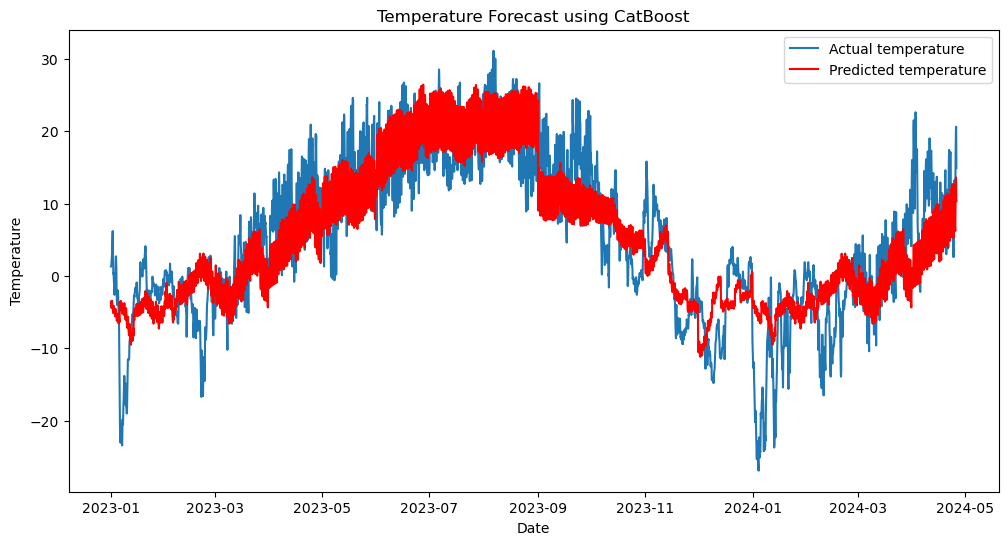

In [59]:

# Load data
data = pd.read_excel('data/archive.xlsx')

data['T'] = data['T'].interpolate(method='linear')

data = data[['Local time in Moscow', 'T']]

data['Local time in Moscow'] = pd.to_datetime(data['Local time in Moscow'], format='%d.%m.%Y %H:%M')

train = data.loc[data['Local time in Moscow'] < '2023-01-01']
test = data.loc[data['Local time in Moscow'] >= '2023-01-01']

# Preprocess data
X_train = train['Local time in Moscow']
X_test = test['Local time in Moscow']
y_train = train['T']
y_test = test['T']

# Extract datetime features
X_train_features = pd.DataFrame()
X_train_features['year'] = X_train.dt.year
X_train_features['month'] = X_train.dt.month
X_train_features['day'] = X_train.dt.day
X_train_features['hour'] = X_train.dt.hour

X_test_features = pd.DataFrame()
X_test_features['year'] = X_test.dt.year
X_test_features['month'] = X_test.dt.month
X_test_features['day'] = X_test.dt.day
X_test_features['hour'] = X_test.dt.hour

# Create and fit CatBoost model
my_catboost = CatBoostRegressor()
my_catboost.fit(X_train_features, y_train)

# Make predictions
forecast = my_catboost.predict(X_test_features)

# Visualize results
plt.figure(figsize=(12, 6))
plt.plot(X_test, y_test, label='Actual temperature')
plt.plot(X_test, forecast, color='red', label='Predicted temperature')
plt.title('Temperature Forecast using CatBoost')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()


In [3]:
# Сохранение модели
joblib.dump(my_catboost, 'back/my_catb_model.joblib')


NameError: name 'my_catboost' is not defined

In [8]:

# Загрузка модели
loaded_model = joblib.load('back/my_catb_model.joblib')

In [66]:
# Загрузка модели
catboost_model = CatBoostRegressor()
catboost_model.load_model('back/catboost_model.bin')

# Теперь вы можете использовать загруженную модель для прогнозирования
new_data = ['2022-01-14 21:00:00']

temp_pred_xgb(data=new_data,model=catboost_model)

-5.523996992068749

In [14]:
# Загрузите новые данные и предобработайте их, извлекая признаки
# Пример: новые данные хранятся в переменной new_data
new_data = ['2024-09-14 21:00:00']

temp_pred_xgb(data=new_data,model=loaded_model)

10.599271559671894

In [15]:

def current_time_to_str():
    # Получить текущее время
    current_time = datetime.now()
    # Преобразовать в строку в нужном формате
    formatted_time = current_time.strftime('%Y-%m-%d %H:%M:%S')
    return formatted_time

# Пример использования функции
formatted_current_time = current_time_to_str()
print(formatted_current_time)


2024-05-07 20:42:38


### MFLOW

если не работает - обновить mlflow

In [ ]:
mlflow_callback = MLflowCallback(
    tracking_uri=your_mlflow_tracking_uri,  # Set your MLflow tracking URI
    metric_name='mae'
)

# Optuna study
study = optuna.create_study(direction='minimize', study_name='CatBoost Optimization')
study.optimize(objective, n_trials=200, callbacks=[mlflow_callback])

#### XGB optimize with OPTUNA

In [11]:
from mlflow import MlflowClient


In [21]:
local_dir = ('C:/Users/Peter/DataspellProjects/kaggle/airflow_train1')

# mlflow.set_tracking_uri(uri='http://127.0.0.1:8010')
# client = MlflowClient(tracking_uri='http://127.0.0.1:8010')

mlflow.set_tracking_uri(uri='http://127.0.0.1:5000')
client = MlflowClient()



[I 2024-05-29 00:54:33,406] A new study created in memory with name: no-name-01c1ed01-46f4-47e6-ac22-c9732870d10b
[I 2024-05-29 00:54:40,390] Trial 0 finished with value: 30.818026026581173 and parameters: {'max_depth': 10, 'learning_rate': 0.023798462781220442, 'n_estimators': 400, 'subsample': 0.8363496086458699, 'colsample_bytree': 0.9654535731061281, 'reg_alpha': 3.1972367785095446, 'reg_lambda': 4.464513840405213}. Best is trial 0 with value: 30.818026026581173.
[I 2024-05-29 00:54:54,837] Trial 1 finished with value: 32.3531792629018 and parameters: {'max_depth': 8, 'learning_rate': 0.04374330171695097, 'n_estimators': 1000, 'subsample': 0.7562756586613477, 'colsample_bytree': 0.8386991104539323, 'reg_alpha': 9.386975412411479, 'reg_lambda': 2.52983762691139}. Best is trial 0 with value: 30.818026026581173.
[I 2024-05-29 00:55:06,641] Trial 2 finished with value: 28.58321304239551 and parameters: {'max_depth': 6, 'learning_rate': 0.010467501462271656, 'n_estimators': 1000, 'subsa

Number of finished trials:  100
Best trial:
  Value:  25.911588656739834
  Params: 
    max_depth: 4
    learning_rate: 0.01161217681023573
    n_estimators: 1000
    subsample: 0.918976174252799
    colsample_bytree: 0.8163223167040442
    reg_alpha: 8.62413827273403
    reg_lambda: 5.947117310322002


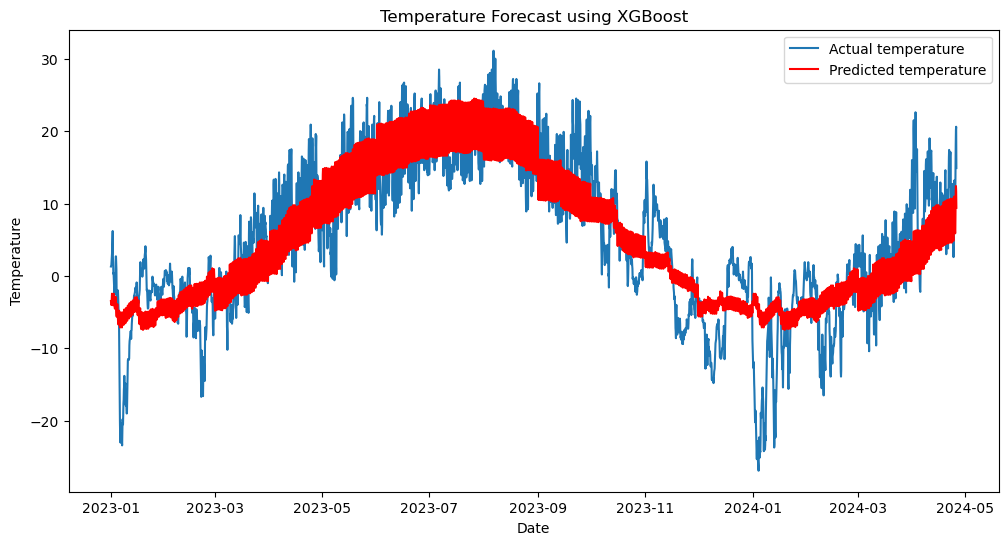

In [25]:
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import optuna
import mlflow

# Load data
data = pd.read_excel('data/archive.xlsx')

data['T'] = data['T'].interpolate(method='linear')

data = data[['Local time in Moscow', 'T']]

data['Local time in Moscow'] = pd.to_datetime(data['Local time in Moscow'], format='%d.%m.%Y %H:%M')

train = data.loc[data['Local time in Moscow'] < '2023-01-01']
test = data.loc[data['Local time in Moscow'] >= '2023-01-01']

# Preprocess data
X_train = train['Local time in Moscow']
X_test = test['Local time in Moscow']
y_train = train['T']
y_test = test['T']

# Extract datetime features
X_train_features = pd.DataFrame()
X_train_features['year'] = X_train.dt.year
X_train_features['month'] = X_train.dt.month
X_train_features['day'] = X_train.dt.day
X_train_features['hour'] = X_train.dt.hour

X_test_features = pd.DataFrame()
X_test_features['year'] = X_test.dt.year
X_test_features['month'] = X_test.dt.month
X_test_features['day'] = X_test.dt.day
X_test_features['hour'] = X_test.dt.hour

def objective(trial):
    params = {
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse',
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000, step=100),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 10)
    }

    my_xgb = xgb.XGBRegressor(**params)
    my_xgb.fit(X_train_features, y_train)

    forecast = my_xgb.predict(X_test_features)

    mse = mean_squared_error(y_test, forecast)
    mae = mean_absolute_error(y_test, forecast)

    with mlflow.start_run(run_name='xgb_optuna_temperature_run'):
        mlflow.log_params(params)
        mlflow.log_metric("mse", mse)
        mlflow.log_metric("mae", mae)

    return mse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

print("Number of finished trials: ", len(study.trials))
print("Best trial:")
best_trial = study.best_trial

print("  Value: ", best_trial.value)
print("  Params: ")
for key, value in best_trial.params.items():
    print("    {}: {}".format(key, value))

# Visualize results
plt.figure(figsize=(12, 6))
plt.plot(X_test, y_test, label='Actual temperature')

# Using the best trial to predict
best_params = best_trial.params
best_xgb = xgb.XGBRegressor(**best_params)
best_xgb.fit(X_train_features, y_train)
forecast = best_xgb.predict(X_test_features)

plt.plot(X_test, forecast, color='red', label='Predicted temperature')
plt.title('Temperature Forecast using XGBoost')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()


In [27]:
"""
Best trial:
  Value:  25.911588656739834
  Params: 
    max_depth: 4
    learning_rate: 0.01161217681023573
    n_estimators: 1000
    subsample: 0.918976174252799
    colsample_bytree: 0.8163223167040442
    reg_alpha: 8.62413827273403
    reg_lambda: 5.947117310322002
"""

'\nBest trial:\n  Value:  25.911588656739834\n  Params: \n    max_depth: 4\n    learning_rate: 0.01161217681023573\n    n_estimators: 1000\n    subsample: 0.918976174252799\n    colsample_bytree: 0.8163223167040442\n    reg_alpha: 8.62413827273403\n    reg_lambda: 5.947117310322002\n'

#### XGBoost with callbacks

C:\Users\Peter\AppData\Local\Temp\ipykernel_52772\3950863629.py:81: ExperimentalWarning: MLflowCallback is experimental (supported from v1.4.0). The interface can change in the future.
  mlflow_callback = MLflowCallback(
[I 2024-05-31 02:17:37,802] A new study created in memory with name: XGBoost Optimization
[I 2024-05-31 02:17:47,910] Trial 0 finished with value: 29.35622325968908 and parameters: {'max_depth': 5, 'learning_rate': 0.09383908735966016, 'n_estimators': 800, 'subsample': 0.8383912630848296, 'colsample_bytree': 0.8706037641097185, 'reg_alpha': 9.10396316938718, 'reg_lambda': 8.536561618044058}. Best is trial 0 with value: 29.35622325968908.
[I 2024-05-31 02:17:57,092] Trial 1 finished with value: 26.37337497610633 and parameters: {'max_depth': 3, 'learning_rate': 0.02137656727551651, 'n_estimators': 900, 'subsample': 0.539514906523131, 'colsample_bytree': 0.5380982807074587, 'reg_alpha': 6.4738951267238285, 'reg_lambda': 4.38192438575446}. Best is trial 1 with value: 26.3

Number of finished trials:  100
Best trial:
  Value:  25.54487777513459
  Params: 
    max_depth: 3
    learning_rate: 0.033622439705080165
    n_estimators: 300
    subsample: 0.6613391981920586
    colsample_bytree: 0.9519651268821888
    reg_alpha: 4.547704971968189
    reg_lambda: 6.198893325029587


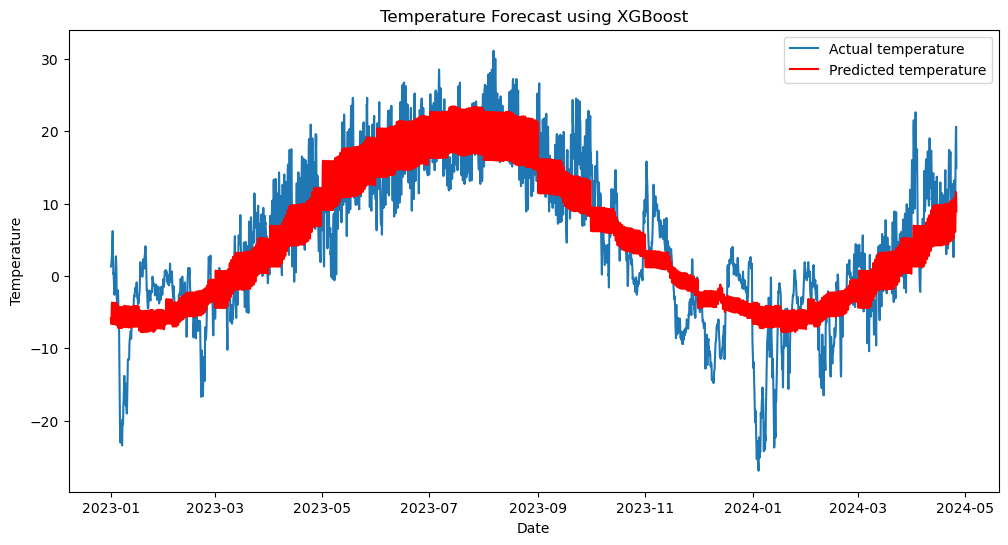

In [28]:
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import optuna
from optuna.integration.mlflow import MLflowCallback
import mlflow
from mlflow.entities import RunStatus

# Set your MLflow tracking URI
mlflow_tracking_uri = 'http://localhost:5000'  # Замените на ваш действительный URI
mlflow.set_tracking_uri(mlflow_tracking_uri)

# Завершаем все активные запуски, если они есть
if mlflow.active_run() is not None:
    mlflow.end_run(status=RunStatus.FAILED)

# Load data
data = pd.read_excel('data/archive.xlsx')

data['T'] = data['T'].interpolate(method='linear')

data = data[['Local time in Moscow', 'T']]

data['Local time in Moscow'] = pd.to_datetime(data['Local time in Moscow'], format='%d.%m.%Y %H:%M')

train = data.loc[data['Local time in Moscow'] < '2023-01-01']
test = data.loc[data['Local time in Moscow'] >= '2023-01-01']

# Preprocess data
X_train = train['Local time in Moscow']
X_test = test['Local time in Moscow']
y_train = train['T']
y_test = test['T']

# Extract datetime features
X_train_features = pd.DataFrame()
X_train_features['year'] = X_train.dt.year
X_train_features['month'] = X_train.dt.month
X_train_features['day'] = X_train.dt.day
X_train_features['hour'] = X_train.dt.hour

X_test_features = pd.DataFrame()
X_test_features['year'] = X_test.dt.year
X_test_features['month'] = X_test.dt.month
X_test_features['day'] = X_test.dt.day
X_test_features['hour'] = X_test.dt.hour

def objective(trial):
    # Завершаем все активные запуски, если они есть
    if mlflow.active_run() is not None:
        mlflow.end_run(status=RunStatus.FAILED)

    with mlflow.start_run(nested=True):
        params = {
            'objective': 'reg:squarederror',
            'eval_metric': 'rmse',
            'max_depth': trial.suggest_int('max_depth', 3, 10),
            'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1),
            'n_estimators': trial.suggest_int('n_estimators', 100, 1000, step=100),
            'subsample': trial.suggest_float('subsample', 0.5, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
            'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
            'reg_lambda': trial.suggest_float('reg_lambda', 0, 10)
        }

        my_xgb = xgb.XGBRegressor(**params)
        my_xgb.fit(X_train_features, y_train)

        forecast = my_xgb.predict(X_test_features)

        mse = mean_squared_error(y_test, forecast)
        mae = mean_absolute_error(y_test, forecast)

        mlflow.log_params(params)
        mlflow.log_metric("mse", mse)
        mlflow.log_metric("mae", mae)

    return mse

mlflow_callback = MLflowCallback(
    tracking_uri=mlflow_tracking_uri,  # Set your MLflow tracking URI
    metric_name='mae'
)

# Optuna study
study = optuna.create_study(direction='minimize', study_name='XGBoost Optimization')
study.optimize(objective, n_trials=100, callbacks=[mlflow_callback])

print("Number of finished trials: ", len(study.trials))
print("Best trial:")
best_trial = study.best_trial

print("  Value: ", best_trial.value)
print("  Params: ")
for key, value in best_trial.params.items():
    print("    {}: {}".format(key, value))

# Visualize results
plt.figure(figsize=(12, 6))
plt.plot(X_test, y_test, label='Actual temperature')

# Using the best trial to predict
best_params = best_trial.params
best_xgb = xgb.XGBRegressor(**best_params)
best_xgb.fit(X_train_features, y_train)
forecast = best_xgb.predict(X_test_features)

plt.plot(X_test, forecast, color='red', label='Predicted temperature')
plt.title('Temperature Forecast using XGBoost')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()


Best trial:
  Value:  25.54487777513459
  Params: 
    max_depth: 3
    learning_rate: 0.033622439705080165
    n_estimators: 300
    subsample: 0.6613391981920586
    colsample_bytree: 0.9519651268821888
    reg_alpha: 4.547704971968189
    reg_lambda: 6.198893325029587

#### SARIMA with Optuna

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import optuna
import mlflow

# Load data
data = pd.read_excel('data/archive.xlsx')

# Interpolate missing temperature values
data['T'] = data['T'].interpolate(method='linear')

# Select relevant columns and convert to datetime
data = data[['Local time in Moscow', 'T']]
data['Local time in Moscow'] = pd.to_datetime(data['Local time in Moscow'], format='%d.%m.%Y %H:%M')

# Sort data by datetime to ensure monotonicity
data.sort_values(by='Local time in Moscow', inplace=True)
data.set_index('Local time in Moscow', inplace=True)

# Ensure frequency is set
data = data.asfreq('H')

# Split data into training and test sets
train = data.loc[data.index < '2023-01-01']
test = data.loc[data.index >= '2023-01-01']

# Separate features and target
y_train = train['T']
y_test = test['T']

# Ensure there are no NaN values in y_train and y_test
y_train = y_train.dropna()
y_test = y_test.dropna()

def sarima_objective(trial):
    order = (trial.suggest_int('p', 1, 5), trial.suggest_int('d', 0, 2), trial.suggest_int('q', 1, 5))
    seasonal_order = (trial.suggest_int('P', 0, 2), trial.suggest_int('D', 0, 2), trial.suggest_int('Q', 0, 2), trial.suggest_int('s', 12, 24))

    model = SARIMAX(y_train, order=order, seasonal_order=seasonal_order, trend='c')
    fitted_model = model.fit(disp=False)

    forecast = fitted_model.forecast(steps=len(y_test))
    forecast = forecast[:len(y_test)]  # Ensure forecast length matches y_test length

    # Ensure there are no NaN values in the forecast
    forecast = forecast.dropna()

    mse = mean_squared_error(y_test[:len(forecast)], forecast)
    mae = mean_absolute_error(y_test[:len(forecast)], forecast)

    with mlflow.start_run(run_name='sarima_optuna_temperature_run'):
        mlflow.log_params({
            'order': order,
            'seasonal_order': seasonal_order
        })
        mlflow.log_metric("mse", mse)
        mlflow.log_metric("mae", mae)

    return mse

study = optuna.create_study(direction='minimize')
study.optimize(sarima_objective, n_trials=10)

print("Number of finished trials: ", len(study.trials))
print("Best trial:")
best_trial = study.best_trial

print("  Value: ", best_trial.value)
print("  Params: ")
for key, value in best_trial.params.items():
    print("    {}: {}".format(key, value))

# Using the best trial to fit SARIMA model
best_order = (best_trial.params['p'], best_trial.params['d'], best_trial.params['q'])
best_seasonal_order = (best_trial.params['P'], best_trial.params['D'], best_trial.params['Q'], best_trial.params['s'])
best_sarima = SARIMAX(y_train, order=best_order, seasonal_order=best_seasonal_order, trend='c')
best_fitted_model = best_sarima.fit(disp=False)
forecast = best_fitted_model.forecast(steps=len(y_test))
forecast = forecast[:len(y_test)]  # Ensure forecast length matches y_test length
forecast = forecast.dropna()  # Ensure there are no NaN values in the forecast

# Visualize results
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual temperature')
plt.plot(y_test.index[:len(forecast)], forecast, color='red', label='Predicted temperature')
plt.title('Temperature Forecast using SARIMA')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()


[I 2024-05-30 02:00:26,776] A new study created in memory with name: no-name-908f511f-36eb-46a8-8583-5dab20d4d9f5
C:\ProgramData\anaconda3\envs\kaggle\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\envs\kaggle\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\envs\kaggle\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
[W 2024-05-30 02:25:12,060] Trial 0 failed with parameters: {'p': 4, 'd': 0, 'q': 5, 'P': 1, 'D': 2, 'Q': 0, 's': 18} b

MemoryError: Unable to allocate 1.55 GiB for an array with shape (58, 58, 61662) and data type float64